# 회귀 심화

## 데이터셋 준비

In [6]:
import numpy as np
import matplotlib.pyplot as plt3

# x_train is the vector of input variables (size in 1000 square feet)
# y_train is the vector of target values (price in 1000s of dollars)

x_train = np.array([1.8, 1.3, 1.7, 1.9, 1.4])
y_train = np.array([430., 320., 390., 490., 400.])

print('x_train =', x_train)
print('y_train =', y_train)

x_train = [1.8 1.3 1.7 1.9 1.4]
y_train = [430. 320. 390. 490. 400.]


In [7]:
x_train.shape

(5,)

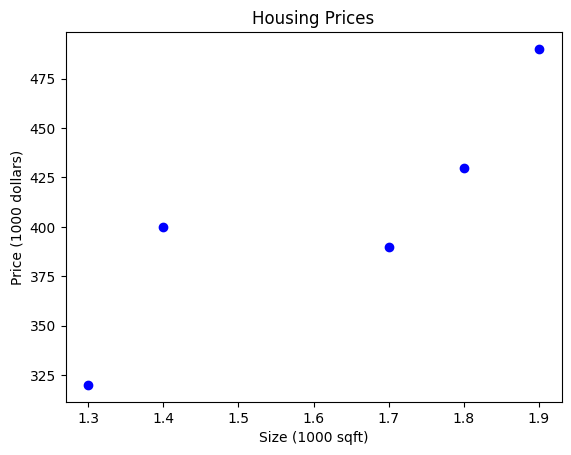

In [8]:
# plot the data points
plt.scatter(x_train, y_train, marker='o', c='blue')

plt.title("Housing Prices")
plt.ylabel('Price (1000 dollars)')
plt.xlabel('Size (1000 sqft)')
plt.show()

## 일변수 선형 회귀 모델
- Model : $y = w x + b$

In [9]:
# Computes the prediction of a linear model
# w, b : model parameters  
# x, y : scalar 

def predict(x, w, b):

    # the linear model y = wx + b
    y = w * x + b
        
    return y

In [10]:
# predict with arbitrary model parameter 
w = 100
b = 10

print('size =     ', x_train[0])
print('price =    ', y_train[0])

# predict the y value of first data(x_train[0]) using w and b
y_hat = w * x_train[0] + b

print('predicted =', y_hat)

size =      1.8
price =     430.0
predicted = 190.0


### 손실 함수
- MSE(Mean Squared Error)

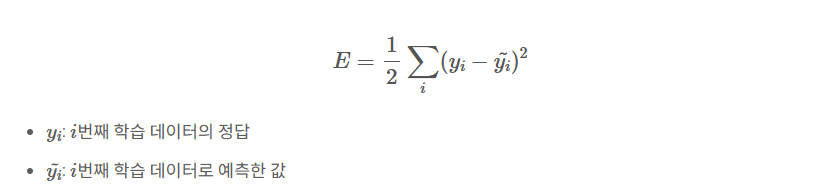

In [11]:
# Computes the cost function - MSE
# x is a vector of training data (ndarray (m,))

def compute_cost(x, y, w, b): 

    # number of training examples
    m = x.shape[0] 
    
    cost = 0   
    for i in range(m): 
        
        # compute the predicted y of each x by the linear model
        y_hat = w * x[i] + b
        
        # square (predicted y - true y), and add
        cost += (y_hat - y[i]) ** 2
        
    cost = (1 / (2 * m)) * cost  
    return cost

In [14]:
print('w =', w)
print('b =', b)
print('y_train =', y_train)
print('y_hat =  ', predict(x_train, w, b))

# check the cost for the model with w = 100, b = 10
cost = compute_cost(x_train, y_train, 100, 10)

print('--> cost =', cost)

w = 100
b = 10
y_train = [430. 320. 390. 490. 400.]
y_hat =   [190. 140. 180. 200. 150.]
--> cost = 28070.0


### Computing gradients


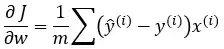
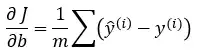

In [15]:
def compute_gradient(x, y, w, b): 
    # x: 입력 데이터 벡터 (ndarray (m,))
    # y: 실제 출력값 벡터 (ndarray (m,))
    # w: 가중치 파라미터 w
    # b: 편향 파라미터 b
    
    # 훈련 데이터의 개수
    m = x.shape[0]
    
    # 그레이디언트 초기화
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        # 예측된 y 값 계산
        y_hat = w * x[i] + b
        
        # 그레이디언트 계산
        dj_dw += -(y[i] - y_hat) * x[i]  # w에 대한 그레이디언트 계산
        dj_db += -(y[i] - y_hat)          # b에 대한 그레이디언트 계산

    # 평균 그레이디언트 계산
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [16]:
# check the gradients for current w, b
print('w =', w)
print('b =', b)
print('x_train =', x_train)
print('y_train =', y_train)

dj_dw, dj_db = compute_gradient(x_train, y_train, w, b)

print('dj_dw =', dj_dw)
print('dj_db =', dj_db)

w = 100
b = 10
x_train = [1.8 1.3 1.7 1.9 1.4]
y_train = [430. 320. 390. 490. 400.]
dj_dw = -384.8
dj_db = -234.0


### 경사 하강법

\begin{equation}
w_{\mathrm{new}} = w_{\mathrm{old}} - \delta \frac{\mathrm{d}\mathscr{L}}{\mathrm{d}w}\big|_{w_{\mathrm{old}}}
\end{equation}

In [17]:
def gradient_descent(x, y, w, b, alpha, num_iters): 
    """
    x (ndarray (m,))  : 데이터, m개의 예시
    y (ndarray (m,))  : 목표값
    alpha (float)     : 학습률
    num_iters (int)   : 반복 횟수

    J_history (list)  : 비용 함수 값의 기록
    """
    J_history = []
    
    for i in range(num_iters):
        # 그레이디언트 계산
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        # 파라미터 업데이트
        w = w - alpha * dj_dw   
        b = b - alpha * dj_db               

        # 비용을 J_history 리스트에 저장
        J_history.append(compute_cost(x, y, w, b))

        # 1000번 반복마다 비용 출력
        if (i % 1000) == 0:
            print('반복 %5d: 비용 %0.2e ' % (i, J_history[-1]))
           
    return w, b, J_history

### Linear regression by gradient descent
- Starting from initial parameters
- Use GD to get the parameters

In [19]:
# 초기 파라미터 설정
w_init = 0
b_init = 0

# 학습률과 반복 횟수 설정
alpha = 0.01
iterations = 10000

# 경사 하강법 실행
w_final, b_final, J_hist = gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations)

# 학습된 파라미터 출력
print('w =', w_final)
print('b =', b_final)

반복     0: 비용 7.79e+04 
반복  1000: 비용 3.99e+02 
반복  2000: 비용 3.96e+02 
반복  3000: 비용 3.93e+02 
반복  4000: 비용 3.92e+02 
반복  5000: 비용 3.90e+02 
반복  6000: 비용 3.90e+02 
반복  7000: 비용 3.89e+02 
반복  8000: 비용 3.88e+02 
반복  9000: 비용 3.88e+02 
w = 201.1031304050341
b = 80.34795484298294


### Plotting cost change

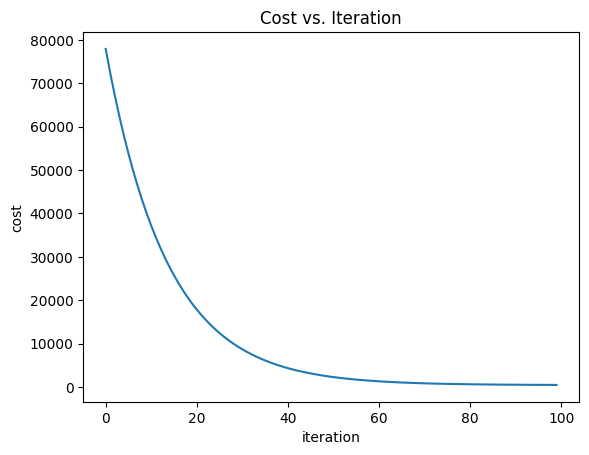

In [21]:
# plot cost during iteration 1 ~ 100 
plt.plot(J_hist[:100])

plt.title("Cost vs. Iteration")
plt.ylabel('cost') 
plt.xlabel('iteration')  
plt.show()

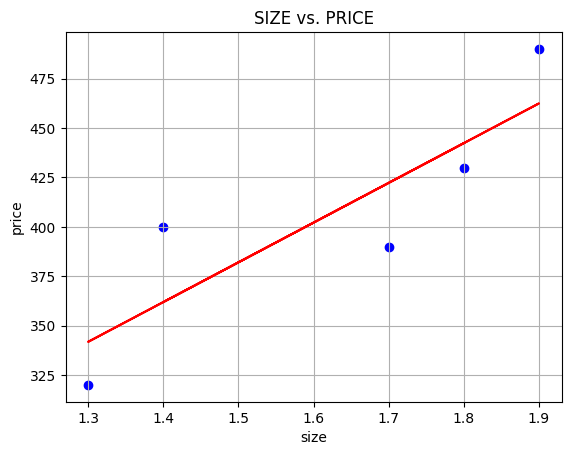

In [23]:
# plot the data points
plt.scatter(x_train, y_train, marker='o', c='blue')

# predict the y value for x_train using learned w and b
y_hat = predict(x_train, w_final, b_final)

# show the model by plotting x_train and y_hat
plt.plot(x_train, y_hat, color='red')  

plt.title('SIZE vs. PRICE') 
plt.xlabel('size') 
plt.ylabel('price') 
plt.grid()
plt.show()

In [24]:
# test price prediction for 1.5 thousand sqft house
size = 1.5
price = predict(size, w_final, b_final)

print('Prediction: %.2f sqft house --> %.2f thousand dollars' % (size*1000, price))

Prediction: 1500.00 sqft house --> 382.00 thousand dollars


## 다변수 선형 회귀 모델

### Sample dataset 
- Task: predicting $ x_{0}(size), x_{1}(rooms) \rightarrow y(price)$
- Be careful! the name of dataset is X_train, not x_train!

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# X_train is the vector of input variables (size in 1000 square feet, number of rooms)
# y_train is the vector of target values (price in 1000s of dollars)

X_train = np.array([[1.8, 4], [1.3, 3], [1.7, 4], [1.9, 5], [1.4, 3]])
y_train = np.array([430., 320., 390., 490., 400.])

print(X_train)
print(y_train)

[[1.8 4. ]
 [1.3 3. ]
 [1.7 4. ]
 [1.9 5. ]
 [1.4 3. ]]
[430. 320. 390. 490. 400.]


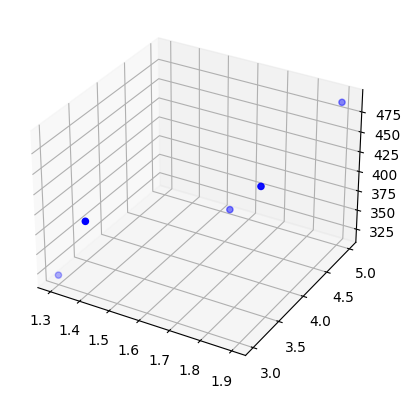

In [29]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# plot the data points in 3D
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='o', c='blue')
plt.show()

### Prediction by a linear model
- Model : $ y = \mathbf{x \cdot w} + b = w_{0} x_{0} + w_{1} x_{1} + b $ 

In [31]:
# Compute the prediction of a linear model
# x : array (m, n) - m examples with n features
# y : vector (m, ) 
# w : model parameters (n, )
# b : model parameter scalar 

def predict(x, w, b): 

    # the linear model y = wx + b
    y = np.dot(x, w) + b    
    
    return y   

-  Prediction - single data
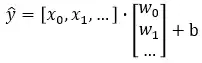

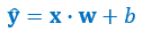

In [32]:
# arbitrary model parameter 
w = np.array([100, 100])
b = 10

# first row from training data
print('X_train[0] =', X_train[0])
print('y_train[0] =', y_train[0])

# predict the y value of first data(X_train[0]) using w and b
y_hat = np.dot(X_train[0], w) + b

print('y_hat =     ', y_hat)

X_train[0] = [1.8 4. ]
y_train[0] = 430.0
y_hat =      590.0


- Prediction - all data
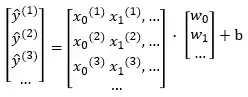

In [33]:
w = np.array([100, 100])
b = 10

# all training data
print('X_train =', X_train)
print('y_train =', y_train)

# predict the y values of all data(X_train) using w and b
y_hat = np.dot(X_train, w) + b

print('y_hat =  ', y_hat)

X_train = [[1.8 4. ]
 [1.3 3. ]
 [1.7 4. ]
 [1.9 5. ]
 [1.4 3. ]]
y_train = [430. 320. 390. 490. 400.]
y_hat =   [590. 440. 580. 700. 450.]


### Cost function 
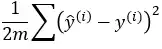
- Vector form 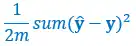

In [36]:
# Computes the cost function - MSE

def compute_cost(X, y, w, b): 
    """
      X (ndarray (m,n)): dataset, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
    """
    # number of training examples and number of features
    m, n = X.shape

    # compute y_hat
    y_hat = np.dot(X, w) + b
    
    # compute the cost
    cost = np.sum((y_hat - y)**2) / (2*m)

    return cost

In [37]:
print('w =', w)
print('b =', b)
print('y_train =', y_train)
print('y_hat =  ', predict(X_train, w, b))

# check the cost for the model with w = [100, 100], b = 10
cost = compute_cost(X_train, y_train, [100, 100], 10)

print('--> cost =', cost)

w = [100 100]
b = 10
y_train = [430. 320. 390. 490. 400.]
y_hat =   [590. 440. 580. 700. 450.]
--> cost = 12270.0


### Computing gradients
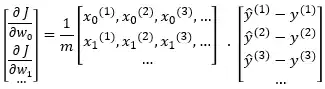
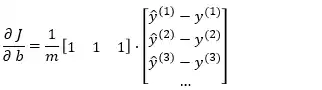
- Vector form 
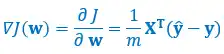
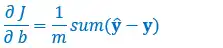

In [22]:
# Computes the gradient for linear regression 

def compute_gradient(X, y, w, b): 
    """
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    # number of training examples and number of features
    m, n = X.shape           
    
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    # compute y_hat
    y_hat = np.dot(X, w) + b
    err = y_hat - y   
    
    # compute gradients
    dj_dw = np.dot(X.T, err) / m
    dj_db = np.sum(err) / m
       
    return dj_dw, dj_db

In [23]:
# check the gradients for current w, b
print('w =', w)
print('b =', b)
print('X_train =', X_train)
print('y_train =', y_train)

dj_dw, dj_db = compute_gradient(X_train, y_train, w, b)

print('dj_dw =', dj_dw)
print('dj_db =', dj_db)

w = [100 100]
b = 10
X_train = [[1.8 4. ]
 [1.3 3. ]
 [1.7 4. ]
 [1.9 5. ]
 [1.4 3. ]]
y_train = [430. 320. 390. 490. 400.]
dj_dw = [247.2 592. ]
dj_db = 146.0


### Gradient descent
- Repeat 

In [38]:
# Performs gradient descent to fit w, b

def gradient_descent(X, y, w, b, alpha, num_iters): 
    """
      X (ndarray (m,n))   : data, m examples with n features
      y (ndarray (m,))    : target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      alpha (float)       : learning rate
      num_iters (int)     : number of iterations 
    """
    # a list to store cost J at each iteration
    J_history = []
    
    for i in range(num_iters):

        # compute the gradient 
        dj_dw, dj_db = compute_gradient(X, y, w, b)

        # update Parameters 
        w = w - alpha * dj_dw            
        b = b - alpha * dj_db 
      
        # save cost to J_history list 
        J_history.append(compute_cost(X, y, w, b))

        # print cost every 1000 iteration
        if (i % 1000) == 0:
            print('Iteration %5d: Cost %0.2e ' % (i, J_history[-1]))
        
    return w, b, J_history 

### Linear regression by gradient descent
- Starting from initial parameters
- Use GD to get the parameters

In [39]:
# initialize parameters
w_init = np.zeros(X_train.shape[1])
b_init = 0.

# set the hyperparameters, 0.1 and 10000
alpha = 0.1
iterations = 10000

# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, w_init, b_init, alpha, iterations)

# print the learned parameters
print('w =', w_final)
print('b =', b_final)

ValueError: operands could not be broadcast together with shapes (5,) (2,) 

### Plotting cost change 

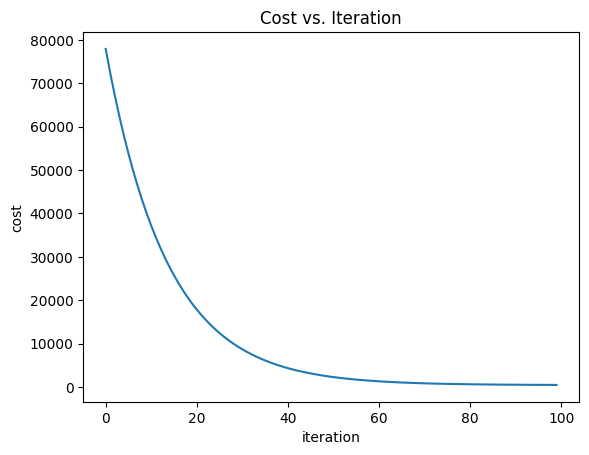

In [40]:
# plot cost during iteration 1 ~ 100 
plt.plot(J_hist[:100])

plt.title("Cost vs. Iteration")
plt.ylabel('cost') 
plt.xlabel('iteration')  
plt.show()

IndexError: invalid index to scalar variable.

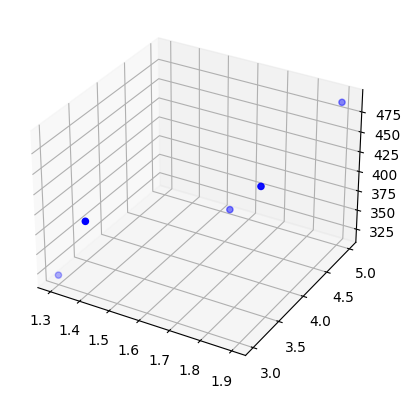

In [41]:
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# plot the data points
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='o', c='blue')

# predict the y values for all meshgrid using learned w and b
x0 = np.arange(1, 2, 0.1)
x1 = np.arange(2, 6, 0.1)
x0, x1 = np.meshgrid(x0, x1)
y_hat = w_final[0] * x0 + w_final[1] * x1 +  b_final

# show the model by plotting Z surface
ax.plot_surface(x0, x1, y_hat, cmap=cm.coolwarm, alpha=0.5)


plt.show()

In [42]:
from sklearn.metrics import mean_squared_error

# compute y_hat for X_train
y_hat = predict(X_train, w_final, b_final)

# print the mean squared error(MSE) between y and y_hat 
print('MSE : %.2f' % mean_squared_error(y_train, y_hat))    

ValueError: y_true and y_pred have different number of output (1!=2)

## Linear Regression using scikit learn 

In [43]:
X_train = np.array([[1.8, 4], [1.3, 3], [1.7, 4], [1.9, 5], [1.4, 3]])
y_train = np.array([430., 320., 390., 490., 400.])

print(X_train)
print(y_train)

[[1.8 4. ]
 [1.3 3. ]
 [1.7 4. ]
 [1.9 5. ]
 [1.4 3. ]]
[430. 320. 390. 490. 400.]


In [44]:
from sklearn.linear_model import LinearRegression

# training the model - use .fit()
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
# print the learned model parameters
print('w = ', lr.coef_)
print('b = ', lr.intercept_)

w =  [138.46153846  22.30769231]
b =  96.92307692307702


In [47]:
from sklearn.metrics import mean_squared_error

# predict y values for X - use .predict()
y_hat = lr.predict(X_train)

# print the mean squared error(MSE) between y and y_hat 
print('MSE : %.2f' % mean_squared_error(y_train, y_hat))   

MSE : 744.62


## Learning_rate

학습률 파라미터가 모델 수행에 있어서 어떤 영향을 끼치는지 실습을 통해 알아봅시다. 손실함수 $\mathscr{L}(w) = w^2$에 대한 경사하강법을 수행하겠습니다.

$\mathscr{L}(w) = w^2$의 도함수가 $\frac{d \mathscr{L}}{d w} = 2w$임을 알고 있는 상태에서 경사하강법 함수 descent_down_parabola()를 작성해보았습니다.

In [48]:
def descent_down_parabola(w_start, learning_rate, num_steps):
    w_values = [w_start]
    for _ in range(num_steps):
        w_old = w_values[-1]
        w_new = w_old - learning_rate * (2 * w_old)
        w_values.append(w_new)
    return np.array(w_values)

In [49]:
descent_down_parabola(10,0.3,5)

array([10.    ,  4.    ,  1.6   ,  0.64  ,  0.256 ,  0.1024])

In [50]:
descent_down_parabola(-10,0.3,5)

array([-10.    ,  -4.    ,  -1.6   ,  -0.64  ,  -0.256 ,  -0.1024])

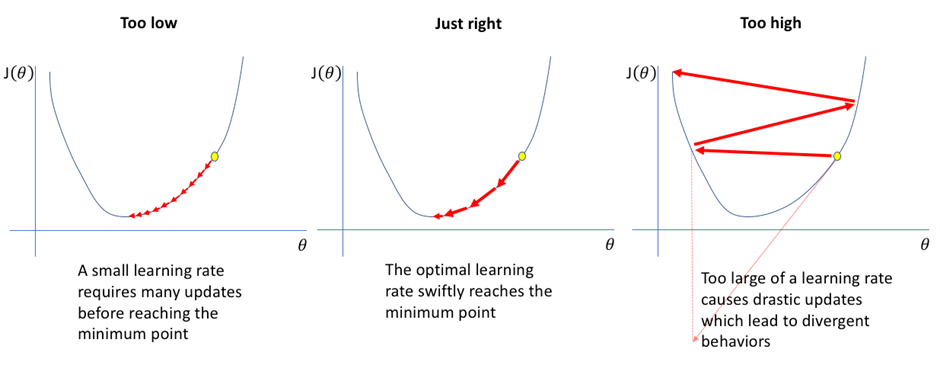

- 학습률의 값이 너무 작게되면 극소값을 찾아가는데 많은 num_steps가 요구됩니다.
- 학습률의 값이 너무 크게되면 미분 계수를 계산한 지점인 w_old와 너무 먼 거리의 w_new 값이 계산되어 나옵니다.

따라서 *적절히 작은 학습률 값의 결정이 중요합니다.*

### learning_rate = 0.3

Text(0.5, 1.0, 'Analyzing Convergence of Gradient Descent on $\\mathscr{L} (w)=w^2$')

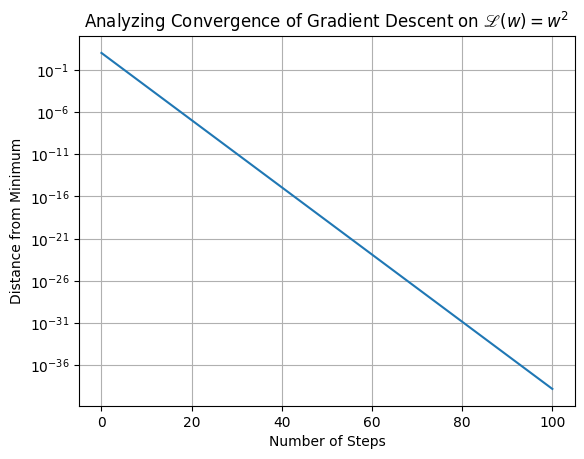

In [51]:
fig, ax = plt.subplots()
out = descent_down_parabola(w_start = 10, learning_rate= 0.3,num_steps = 100)
ax.plot(np.abs(out))
ax.set_yscale("log")
ax.grid(True)

ax.set_ylabel("Distance from Minimum")
ax.set_xlabel("Number of Steps")
ax.set_title(r"Analyzing Convergence of Gradient Descent on $\mathscr{L} (w)=w^2$")

### learning_rate = 3

Text(0.5, 1.0, 'Analyzing Convergence of Gradient Descent on $\\mathscr{L} (w)=w^2$')

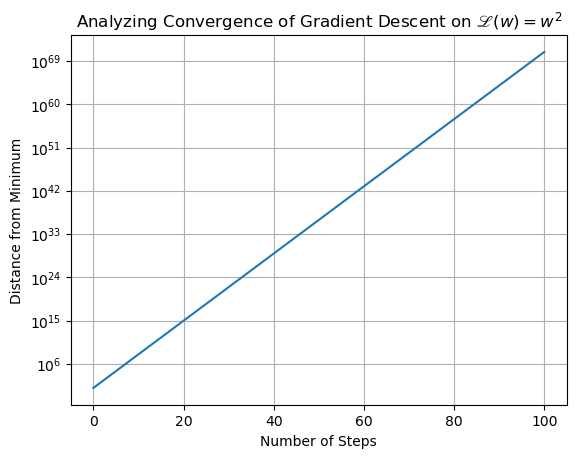

In [37]:
fig, ax = plt.subplots()
out = descent_down_parabola(w_start = 10, learning_rate= 3,num_steps = 100)
ax.plot(np.abs(out))
ax.set_yscale("log")
ax.grid(True)

ax.set_ylabel("Distance from Minimum")
ax.set_xlabel("Number of Steps")
ax.set_title(r"Analyzing Convergence of Gradient Descent on $\mathscr{L} (w)=w^2$")

In [38]:
descent_down_parabola(10,3,10)

array([       10,       -50,       250,     -1250,      6250,    -31250,
          156250,   -781250,   3906250, -19531250,  97656250])

### 실습 1 : 적절한 learning_rate 탐색

learning_rate는 값을 직접 정해줘야하는 파라미터에 해당합니다.이러한 파라미터를 **하이퍼 파라미터**라고 하며 해당 파라미터를 조정하는 과정을 **하이퍼 파라미터 튜닝**이라고합니다.

 learning_rate의 경우 10의 배수꼴의 수들을 먼저 튜닝에 사용해본다고 합니다. 0,001, 0.01, 0.1, 1 값을 넣어 파라미터 튜닝을 진행하고 어떤 값을 모델에 사용할지 결정해보세요

**최적의 alpha 값:**

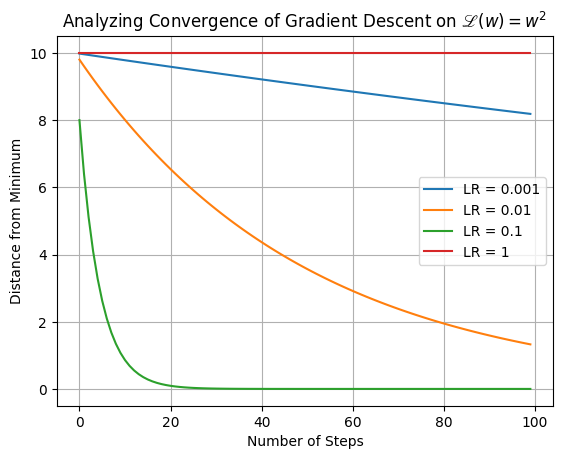

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def descent_down_parabola(w_start, learning_rate, num_steps):
    w = w_start
    distances = []
    for _ in range(num_steps):
        gradient = 2 * w
        w = w - learning_rate * gradient
        distance = abs(w)
        distances.append(distance)
    return distances

learning_rates = [0.001, 0.01, 0.1, 1]
num_steps = 100

fig, ax = plt.subplots()
#ax.set_yscale("log")
ax.grid(True)
ax.set_ylabel("Distance from Minimum")
ax.set_xlabel("Number of Steps")
ax.set_title(r"Analyzing Convergence of Gradient Descent on $\mathscr{L} (w) = w^2$")

for lr in learning_rates:
    out = descent_down_parabola(w_start=10, learning_rate=lr, num_steps=num_steps)
    ax.plot(out, label=f'LR = {lr}')

ax.legend()
plt.show()


## 규제 선형 모델 

### 데이터셋 준비

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [55]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
perch_full# 농어의 길이,높이,너비에 대한 데이터

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [59]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [60]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

### Polynomial Features

Polynomial Features 클래스는 기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가합니다. 

In [61]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))
#2와 3을 곱한 6
#2의 제곱 4, 3의 제곱 9

[[2. 3. 4. 6. 9.]]


In [62]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 9)


In [63]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

### 다중 회귀 모델 훈련하기

In [64]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target)) #train 세트
print(lr.score(test_poly, test_target))   #test set

0.9903183436982126
0.9714559911594125


0.99 라는 의미는 train 에 과도하게 적합한 (overfit) 모델이다.

In [65]:
poly = PolynomialFeatures(degree=5, include_bias=False) # 5제곱항까지 특성을 만들기

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [66]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999997232
-144.40564483377855


특징의 개수를 늘리면 선형 모델은 아주 강력해집니다 = 훈련세트에 대해 거의 완벽하게 학습할 수 있죠. 하지만 모델이 훈련세트에 너무 과대적합된 상태 즉 overfitting된 상태가 됩니다. 

### 릿지

In [67]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [68]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


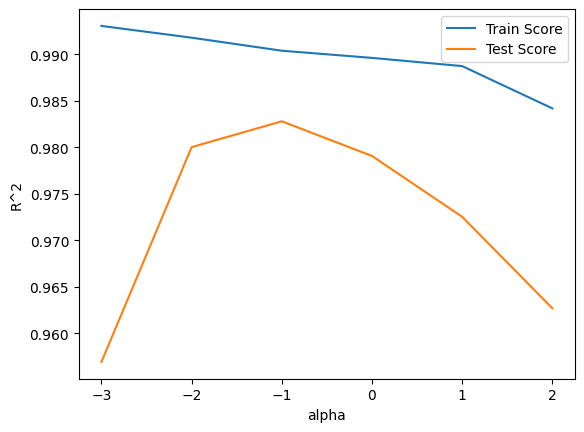

In [72]:
import matplotlib.pyplot as plt

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['Train Score', 'Test Score'])
plt.show()

In [70]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


### 라쏘

In [71]:
from sklearn.linear_model import Lasso
import warnings

warnings.filterwarnings("ignore")

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


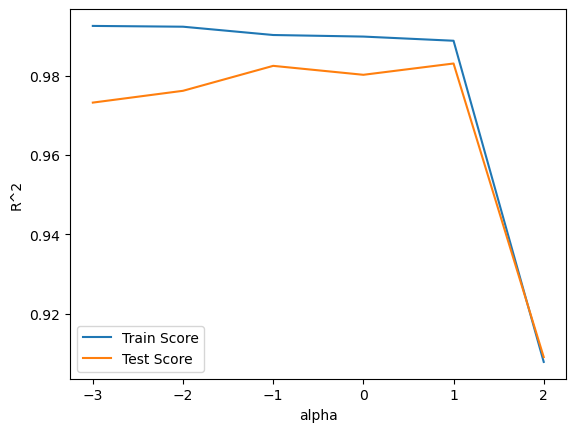

In [55]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['Train Score', 'Test Score'])
plt.show()

#### 실습 2 : 적절한 alpha 값 찾기


- 가장 overfitting 되어있는 alpha 값 : 0.001
- 가장 underfitting 되어있는 alpha 값 : 
- **따라서 도출된 최적의 alpha 값을 넣어 아래 코드를 돌려주세요**

In [75]:
lasso = Lasso(alpha= 10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [57]:
print(np.sum(lasso.coef_ == 0))

40


## 차원 축소

### 개요

**차원/특성** \
분석하는 데이터의 종류의 수\
→ 하나의 변수는 하나의 차원을 의미한다. 4개의 독립변인들이 하나의 공간에 표현되기 위해서는 그 공간이 4차원이어야 한다. 

**차원 축소** \
: 원본 데이터의 특성(차원)을 적은 수의 새로운 특성(차원)으로 변환하는 비지도 학습의 한 종류

특성/차원이 많을 경우, "차원의 저주" 문제
- 표본의 밀도 떨어짐
- 훈련 데이터에 쉽게 과대적합 overfitting 위험
- 낮은 모델 성능

__목적__\
차원을 줄인다면,
- 데이터셋의 크기를 줄일 수 있어 해석력 확보 & 비교적 시각화가 쉬움
- 차원 축소된 데이터를 지도 학습 알고리즘이나 다른 비지도 학습 알고리즘에 재사용하여 성능 높이거나 훈련 속도 빠르게 만들 수 있음

__예시__

In [78]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

iris=load_iris()
columns=['sepal_length','sepal_width','petal_length','petal_width']
df=pd.DataFrame(iris.data,columns=columns)
df['target']=iris.target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


_만약, 2개의 변수로도 4개(전체)의 변수의  분산에 대해 설명할 수 있다면 target을 분류할 때 2개만 사용하면 되지 않을까?_

### 주성분 분석 PCA

**주성분 분석 PCA** \
: 고차원 데이터를 기존의 분산을 최대한 보존하는 선형 독립의 새로운 변수들로 변환\
: 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원 축소

※ PCA는 단순히 주성분 분석이 아니라, 주성분이 될 수 있는 형태로 기존데이터에 변환을 가하는 것

**분산을 최대한 보존한다는 게 무슨 뜻?**\
: PCA의 핵심은 데이터를 축에 사영했을 때 가장 높은 분산을 가지는 데이터의 축을 찾는것\
 -> 그 축으로 차원을 축소! **이 축 = 주성분**
 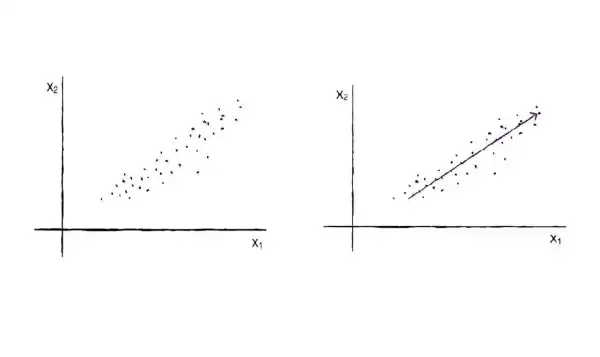

**분산** (= 변산성 = 차이) \
: 데이터가 담고 있는 가장 유용한 정보인 "차이"에 대한 정보
-  축에 사영했을 때,\
분산이 크다 = 원래 데이터의 분포를 잘 설명할 수 있다 = 정보 손실 최소화
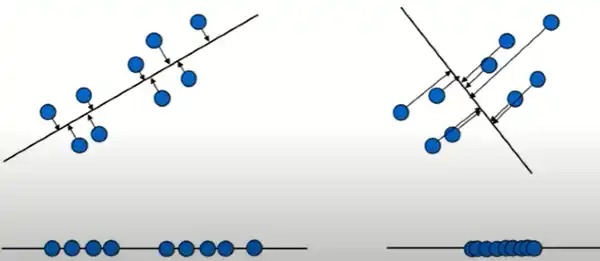

**PCA 과정**
1. 제일 먼저 가장 큰 분산을 기반으로 첫 번째 축을 생성
2. 두 번째 축은 이 벡터 축에 수직이고 분산이 가장 큰 다음 방향을 찾음
3. 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 축으로 설정하는 방식으로 축을 생성

이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소

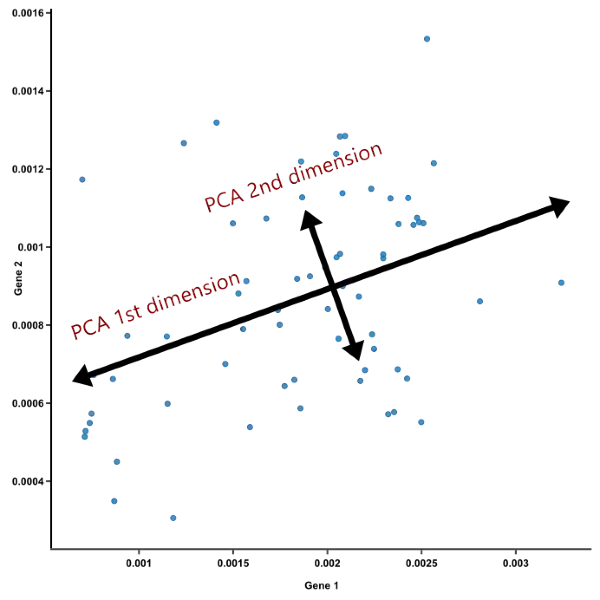

왜 직각이 되는 벡터를 다음 축으로? \
참고: https://gentlej90.tistory.com/15

__[선형대수 관점]__

1. 데이터 정규화/표준화
2. 입력 데이터 세트의 공분산 행렬을 계산
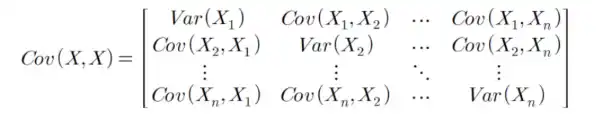
3. 공분산 행렬을 고유값 분해해서 고유벡터eigenvector와 고유값eigenvalue을 구한다.
- 공분산의 고유벡터eigenvector : 전체 데이터가 어느 방향으로 분산 되어 있는지를 보여줌. 
- 공분산의 고유값eigenvalue : 고유벡터의 크기를 의미.
4. 지정된 최소 분산 크기 이상을 설명하도록, 고유값eigenvalue이 큰 순대로 K개의 변환 차수만큼 고유벡터eigenvector를 추출 (이게 우리의 __'주성분'__)
- 고유값이 크다? => 각각의 고유값이 해당하는 고유벡터의 방향만큼 어느 정도로 분산되어 있는지를 보여준다. 따라서 고유 값이 큰 순서대로 주성분 분석을 시행한다.<br>
5. 고유벡터eigenvector에 입력 데이터를 선형 변환하여 새로운 저차원의 데이터 얻기 !

**고유값 분해**

고유값이 고유벡트의 크기를 나타내고 입력 데이터의 분산을 나타냄

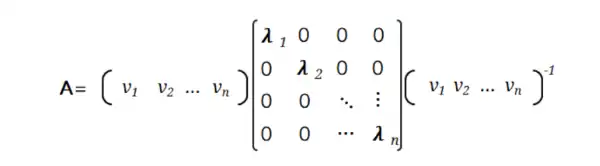

- v1, v2 ... vn : 고유벡터 eigenvector
- λ1, λ2 ... λn : 고유값 eigenvalue

v1이 가장 분산이 큰 방향을 가진 고유벡터이고 v2는 v1에 수직이면서 다음으로 가장 분산이 큰 방향을 가진 고유벡터

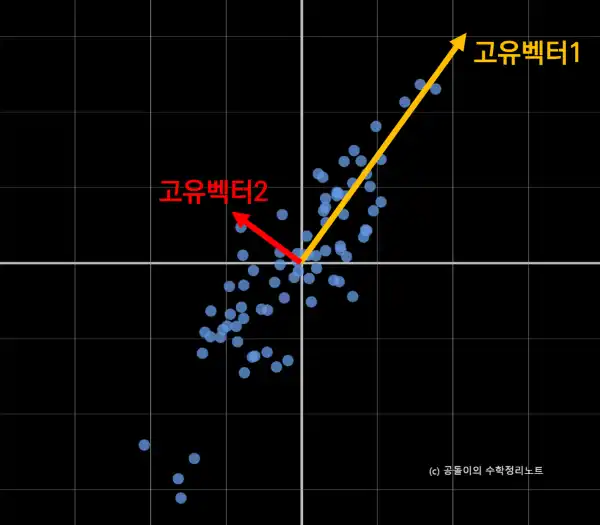

> 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA

<br>

__주성분 개수 결정__
1. 성분들이 설명하는 분산 비율이 70~90% 사이 가되는 주성분 개수 선택
2. 고유값(eigenvalue) > 1 인 주성분만 사용

### PCA 실행

In [79]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

iris=load_iris()
columns=['sepal_length','sepal_width','petal_length','petal_width']
df=pd.DataFrame(iris.data,columns=columns)
df['target']=iris.target
df.head()
# 0은 setosa, 1은 versicolor, 2는 virginica

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


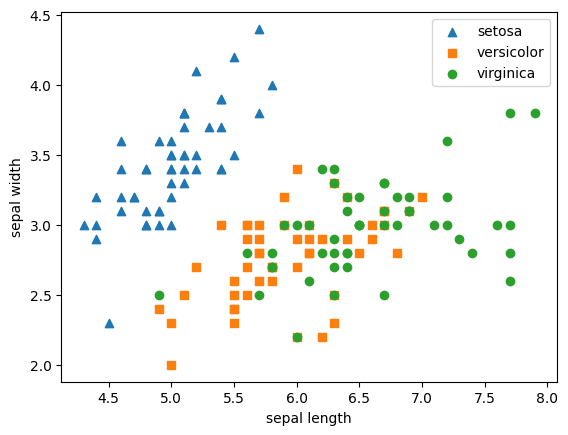

In [80]:
markers=['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data=df[df['target']==i]['sepal_length']
    y_axis_data=df[df['target']==i]['sepal_width']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [81]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
x = df.drop(['target'], axis=1).values # 독립변인들의 value값만 추출
y = df['target'].values # 종속변인 추출

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
pd.DataFrame(x, columns=features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


- scale을 하지 않으면 변인이 가진 값의 크기에 따라 설명 가능한 분산량이 왜곡될 수 있기 때문에 반드시 표준화를 해주어야 한다. 
- 설명 가능한 분산량이 왜곡됨에 따라 모델 성능이 저하될 수 있다

참고 :https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html

In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
pcaComponents = pca.fit_transform(x) # 차원 축소

# 주성분으로 이루어진 데이터 프레임 구성
principalDf = pd.DataFrame(data=pcaComponents, columns = ['pca_component1', 'pca_component2'])
principalDf['target']=iris.target
principalDf.head()

,pca_component1,pca_component2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


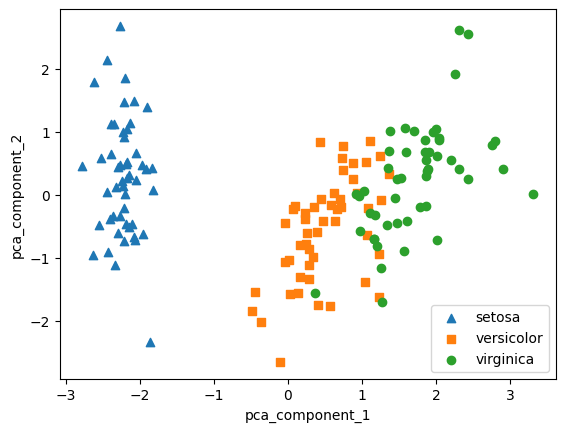

In [85]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미
markers=['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data=principalDf[principalDf['target']==i]['pca_component1']
    y_axis_data=principalDf[principalDf['target']==i]['pca_component2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [86]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

### 주성분 개수 정하기

__1. 전체에서 해당 주성분의 고윳값이 차지하는 분산의 비율 (70~90%)__

In [87]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [88]:
#target 빼고 모든 열 가져오기
data=df[df.columns[0:4]]

#모든 성분을 주성분으로 pca
pca_all=PCA(n_components=len(df.columns)-1)
pca_all_fit = pca_all.fit_transform(x)

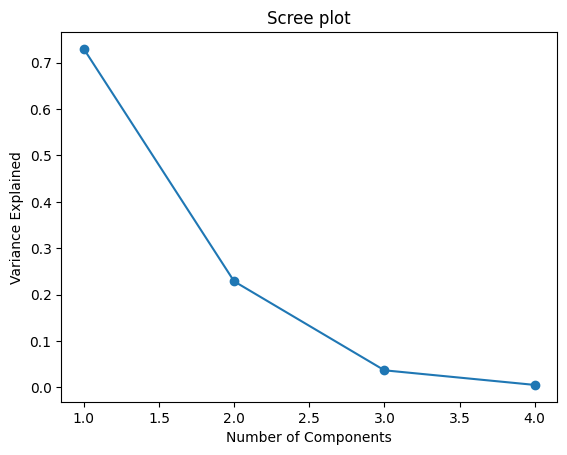

In [89]:
#Scree plot
value_number = np.arange(pca_all.n_components) + 1
plt.title('Scree plot')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.plot(value_number, pca_all.explained_variance_ratio_, 'o-')

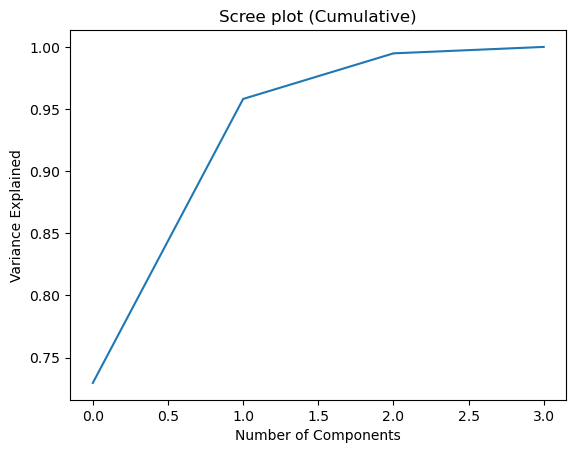

In [68]:
plt.title('Scree plot (Cumulative)')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.plot(np.cumsum(pca_all.explained_variance_ratio_))

__2. Eigenvalue > 1__

In [69]:
import numpy as np
from sklearn.preprocessing import StandardScaler

#Covariance Matrix
cov_mat = np.cov(x.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' %eig_vals)
print('Eigenvectors \n%s' %eig_vecs)


Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


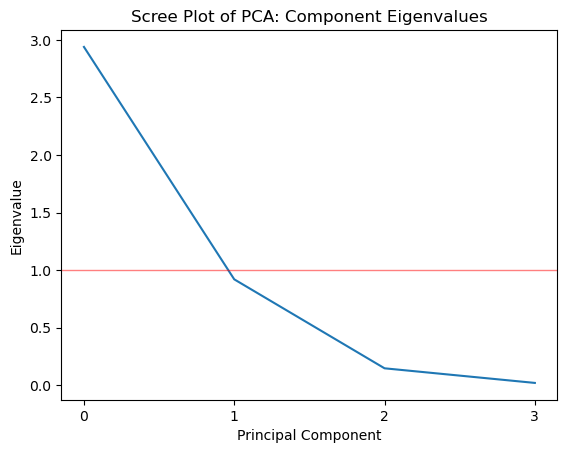

In [70]:
def scree_plot():
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(pca_all.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Scree Plot of PCA: Component Eigenvalues')
    show()

scree_plot()

참고
- https://jmausolf.github.io/code/pca_in_python/

## Scaling

### 실습 3: MinMaxScaler를 활용하여 train set, test set 스케일링
- 모든 feature가 **0과 1사이에 위치**하게 만듭니다.<br>
데이터가 2차원 셋일 경우, 모든 데이터는 x축의 0과 1 사이에, y축의 0과 1사이에 위치하게 됩니다.

- 아래 *****를 채워주세요

In [91]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets
# IRIS 데이터 로드
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [92]:
# Train 데이터와 Test 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
scaler_normalized = MinMaxScaler()
X_train_normalized = scaler_normalized.fit_transform(X_train)
X_test_normalized = scaler_normalized.transform(X_test)

In [77]:
print("Normalized Train Data:")
print(X_train_normalized[:5])

Normalized Train Data:
[[0.08823529 0.66666667 0.         0.04166667]
 [0.41176471 1.         0.0877193  0.125     ]
 [0.70588235 0.45833333 0.59649123 0.54166667]
 [0.14705882 0.58333333 0.10526316 0.04166667]
 [0.02941176 0.5        0.05263158 0.04166667]]
